In [2]:
from typing import *
from yspecies import *
from yspecies.enums import *
from yspecies.dataset import *
from yspecies.misc import *

In [3]:
from dataclasses import dataclass
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Parameters ###
Will be overriden by comparisons.yaml

In [6]:
from pathlib import Path
locations: Locations = Locations("./") if Path("./data").exists() else Locations("../")

In [21]:
ref = pd.read_csv(locations.input.genes.dir / "reference_genes.tsv", sep="\t", index_col="gene")
ref.head(10)

,species,symbol
gene,,
ENSG00000242265,Homo_sapiens,PEG10
ENSG00000139990,Homo_sapiens,DCAF5
ENSG00000073921,Homo_sapiens,PICALM
ENSG00000139687,Homo_sapiens,RB1
ENSG00000119977,Homo_sapiens,TCTN3
ENSG00000145592,Homo_sapiens,RPL37
ENSG00000242866,Homo_sapiens,STRC
ENSG00000135506,Homo_sapiens,OS9
ENSG00000150687,Homo_sapiens,PRSS23


In [15]:

def load(name: str, expressions_path: Path, genes_path: Path, samples_path: Path, sep="\t", validate: bool = True):
    expressions =  pd.read_csv(expressions_path, sep=sep,  index_col="run")
    genes = pd.read_csv(genes_path, sep=sep, index_col="Homo_sapiens")
    samples = pd.read_csv(samples_path, sep=sep,  index_col="run")
    return ExpressionDataset(name, expressions, genes, samples, validate=validate)

def from_folder(folder: Path,
         expressions_name: str = "expressions.tsv",
         genes_name: str = "genes.tsv",
         samples_name: str = "samples.tsv"):
    name = folder.name
    return load(name, folder / expressions_name, folder / genes_name, folder / samples_name)


In [17]:
e = from_folder(locations.interim.dir / "selected")
e

expressions,genes,species,samples
"(445, 12243)",12243,39,445


In [77]:
selected = pd.read_csv(locations.output.intersections / "intersections.tsv", sep="\t")
selected.reference_gene.to_list()

['ENSG00000185880',
 'ENSG00000133256',
 'ENSG00000006282',
 'ENSG00000129187',
 'ENSG00000157343',
 'ENSG00000107815',
 'ENSG00000164879',
 'ENSG00000107551',
 'ENSG00000198663',
 'ENSG00000149577',
 'ENSG00000113946',
 'ENSG00000168060',
 'ENSG00000214827',
 'ENSG00000152580',
 'ENSG00000170417',
 'ENSG00000169189',
 'ENSG00000177084',
 'ENSG00000101605',
 'ENSG00000089234',
 'ENSG00000160323',
 'ENSG00000166436',
 'ENSG00000069275',
 'ENSG00000138382']

In [78]:
se = e[selected.reference_gene.to_list()]
se

expressions,genes,species,samples
"(445, 23)",23,39,445


In [79]:
se

expressions,genes,species,samples
"(445, 23)",23,39,445


Text(0.5, 1.0, 'selected')

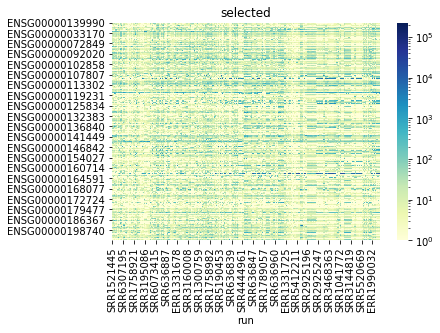

In [86]:
from matplotlib.colors import LogNorm

sns.heatmap(e.expressions.T,  cmap="YlGnBu",  norm=LogNorm(), vmin=1).set_title(e.name)  

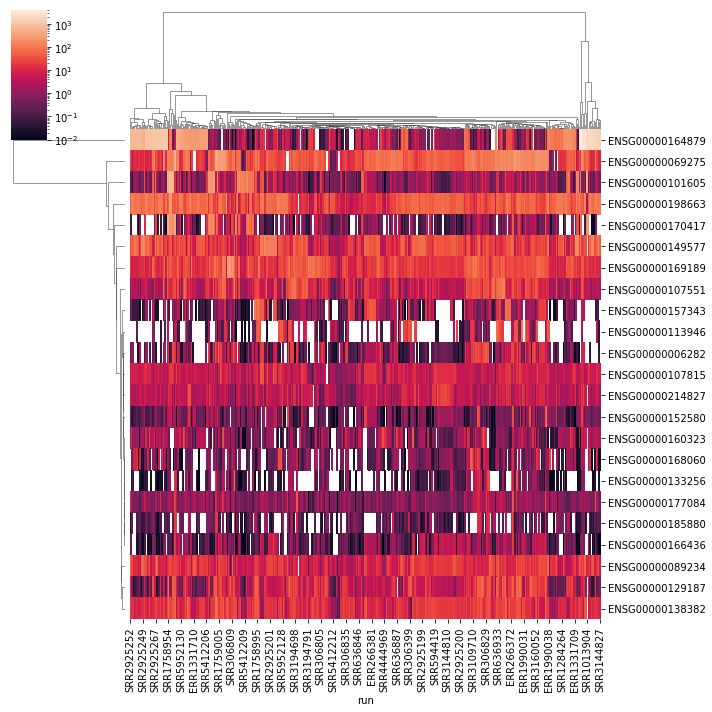

In [85]:
sns.clustermap(se.expressions.T.fillna(0.0),  norm=LogNorm(), vmin=0.01)